In [1]:
! pip install -e ..

Obtaining file:///C:/Users/ADMIN/Desktop/BACKUP/study/Italy/polito/classes/20242/deep%20learning/project/source_code/fl-g13
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Checking if build backend supports build_editable: started
  Checking if build backend supports build_editable: finished with status 'done'
  Getting requirements to build editable: started
  Getting requirements to build editable: finished with status 'done'
  Preparing editable metadata (pyproject.toml): started
  Preparing editable metadata (pyproject.toml): finished with status 'done'
  Building editable for fl_g13 (pyproject.toml): started
  Building editable for fl_g13 (pyproject.toml): finished with status 'done'
  Created wheel for fl_g13: filename=fl_g13-0.0.1-py3-none-any.whl size=4649 sha256=a588eeccbccdbea56dbfe92e55bd612babd81e07366f39e361ccc99a5ffdec08
  Stored in directory: C:\Users\ADMIN\AppData\Local\Temp\pip-ephem-wheel-cache-03ssktfo\wheels\b7


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from fl_g13.fl_pytorch.client_app import get_client_app
from fl_g13.fl_pytorch.server_app import get_server_app
from fl_g13.fl_pytorch.model import get_experiment_setting, Net
from fl_g13.architectures import BaseDino
from flwr.simulation import run_simulation
from fl_g13.fl_pytorch.constants import (
    NUM_CLIENTS, 
    DEFAULT_FRACTION_FIT, 
    DEFAULT_NUM_ROUNDS, 
    DEFAULT_LOCAL_EPOCHS, 
    BATCH_SIZE,
    NUM_SHARDS_PER_PARTITION,
    DEFAULT_FRACTION_EVALUATE,
    MIN_NUM_CLIENTS
)

2025-05-03 09:24:14.305 | INFO     | fl_g13.config:<module>:11 - PROJ_ROOT path is: C:\Users\ADMIN\Desktop\BACKUP\study\Italy\polito\classes\20242\deep learning\project\source_code\fl-g13


In [3]:
DEBUG = True

number_of_rounds = DEFAULT_NUM_ROUNDS
fraction_fit = DEFAULT_FRACTION_FIT
fraction_evaluate = DEFAULT_FRACTION_EVALUATE
number_of_clients = NUM_CLIENTS
min_num_clients = MIN_NUM_CLIENTS
show_distribution = False
local_epochs = DEFAULT_LOCAL_EPOCHS
batch_size = BATCH_SIZE
num_shards_per_partition = NUM_SHARDS_PER_PARTITION
use_wandb = True
model_class = BaseDino

if DEBUG:
    number_of_rounds = 2
    fraction_fit = 1
    number_of_clients = 3
    min_num_clients = 3
    show_distribution = True
    local_epochs = 2
    batch_size = 128
    num_shards_per_partition = 6
    use_wandb = True
    model_class = Net

In [4]:
checkpoint_dir = "./../models/"

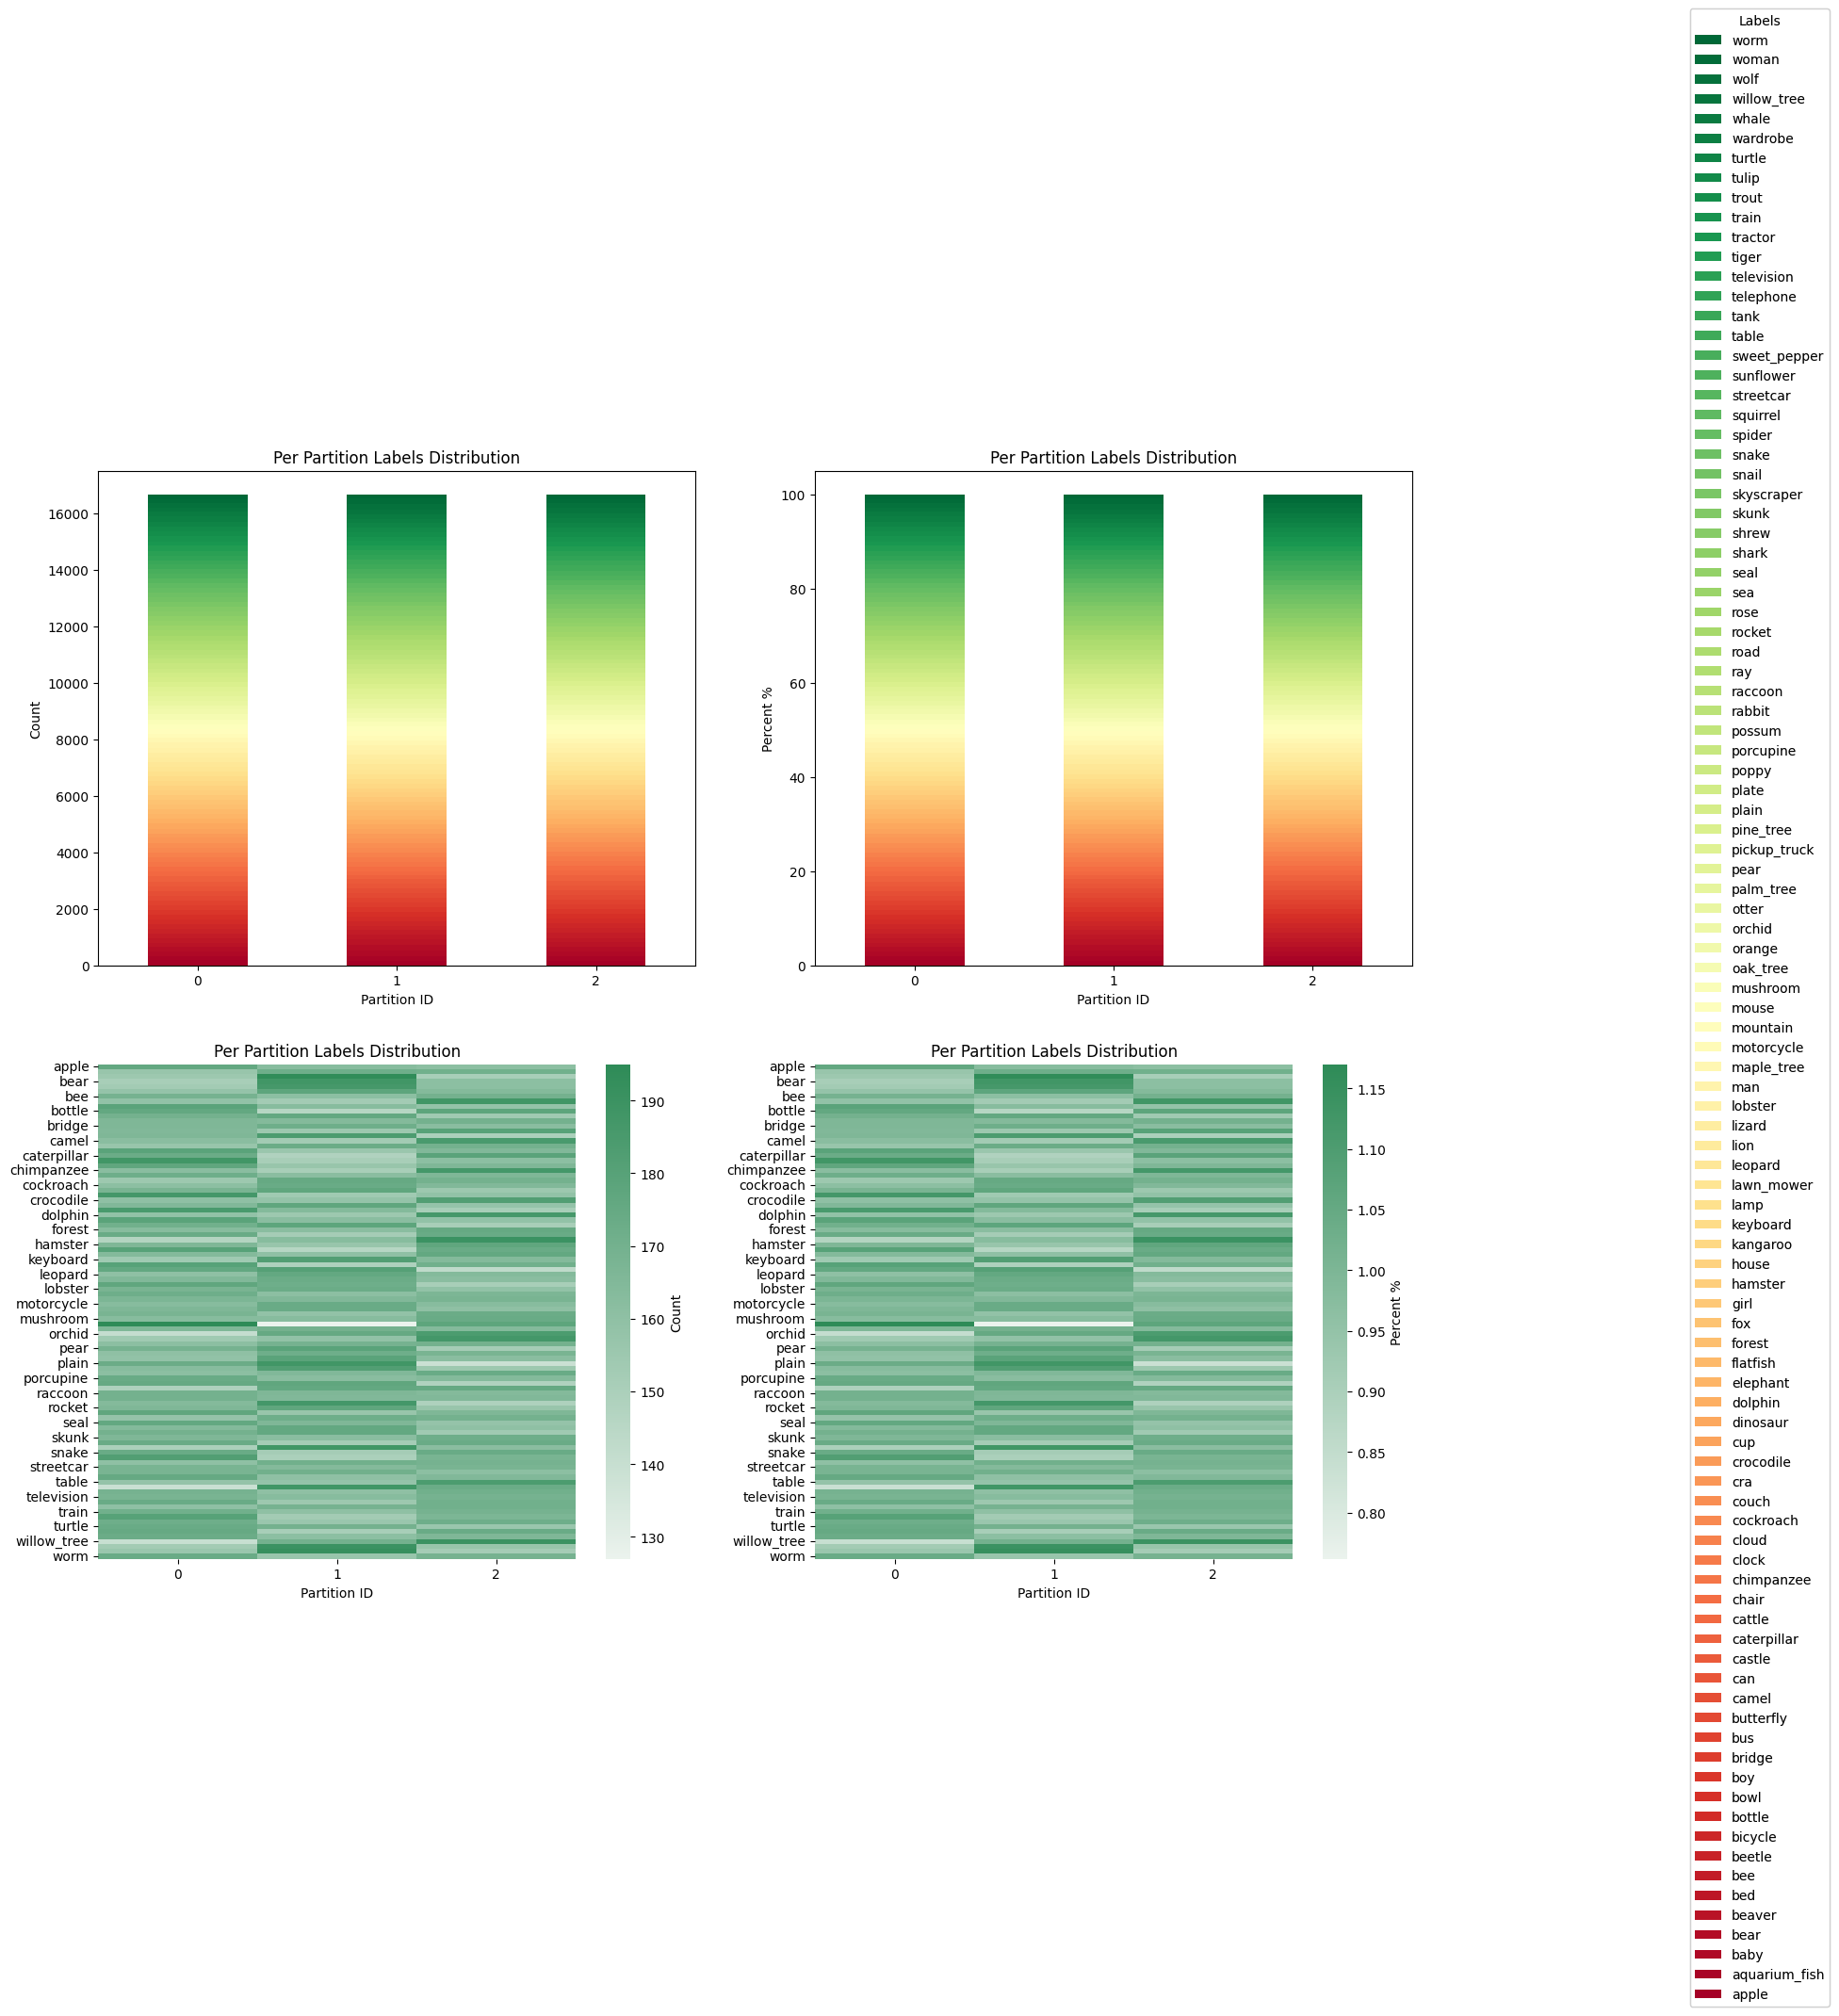

In [5]:
from flwr_datasets import FederatedDataset, partitioner
from fl_g13.fl_pytorch.datasets import show_partition_distribution
    
if show_distribution:
    fds = FederatedDataset(
            dataset="cifar100",
            partitioners={"train": partitioner.IidPartitioner(num_partitions=number_of_clients)}
        )
    p = fds.partitioners["train"]
    show_partition_distribution(p)

In [6]:
starting_lr = 0.25
momentum = 0.9
wandb_config = {
    "partition_type": "iid",
    "starting_lr": starting_lr,
    "momentum": momentum,
}

In [7]:
model, optimizer, criterion, device, scheduler = get_experiment_setting(checkpoint_dir, model_class, starting_lr, momentum)
client_app = get_client_app(
    model, 
    optimizer, 
    criterion, 
    device, 
    partition_type="iid", 
    local_epochs=local_epochs,
    batch_size=batch_size,
    num_shards_per_partition=num_shards_per_partition,
    scheduler=scheduler,
)
server_app = get_server_app(
    model_class=model_class, 
    optimizer=optimizer, 
    criterion=criterion, 
    device=device, 
    num_rounds=number_of_rounds, 
    min_available_clients=number_of_clients,
    min_fit_clients=min_num_clients,
    min_evaluate_clients=min_num_clients,
    checkpoint_dir=checkpoint_dir,
    fraction_fit=fraction_fit,
    fraction_evaluate=fraction_evaluate,
    use_wandb=use_wandb,
    wandb_config=wandb_config,
    scheduler=scheduler,
)

⚠️ No checkpoint found at ./../models/. Creating a new model.


In [8]:
import os
import urllib.request


def download_if_not_exists(file_path: str, file_url: str):
    """
    Checks if a file exists at the given path. If it does not, downloads it from the specified URL.

    Parameters:
    - file_path (str): The local path to check and save the file.
    - file_url (str): The URL from which to download the file.
    """
    if not os.path.exists(file_path):
        print(f"'{file_path}' not found. Downloading from {file_url}...")
        try:
            urllib.request.urlretrieve(file_url, file_path)
            print("Download complete.")
        except Exception as e:
            print(f"Failed to download file: {e}")
    else:
        print(f"'{file_path}' already exists.")

In [9]:
download_if_not_exists("vision_transformer.py",
                       "https://raw.githubusercontent.com/facebookresearch/dino/refs/heads/main/vision_transformer.py")
download_if_not_exists("utils.py",
                       "https://raw.githubusercontent.com/facebookresearch/dino/refs/heads/main/utils.py")


'vision_transformer.py' already exists.
'utils.py' already exists.


In [ ]:
run_simulation(
    client_app=client_app,
    server_app=server_app,
    num_supernodes=number_of_clients
)

Continue train model from epoch 1


C:\Users\ADMIN\Desktop\BACKUP\study\Italy\polito\classes\20242\deep learning\project\source_code\fl-g13\.venv\lib\site-packages\notebook\utils.py:280: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  return LooseVersion(v) >= LooseVersion(check)
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: stefano-gamba-social (stefano-gamba-social-politecnico-di-torino) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
C:\Users\ADMIN\Desktop\BACKUP\study\Italy\polito\classes\20242\deep learning\project\source_code\fl-g13\.venv\lib\site-packages\wandb\analytics\sentry.py:259: DeprecationWarning: The `Scope.user` setter is deprecated in favor of `Scope.set_user()`.
  self.scope.user = {"email": email}  # noqa


INFO :      Starting Flower ServerApp, config: num_rounds=2, no round_timeout
INFO :      
INFO :      [INIT]
INFO :      Using initial global parameters provided by strategy
INFO :      Starting evaluation of initial global parameters
Eval progress: 100%|██████████| 313/313 [00:19<00:00, 16.13batch/s]


Server round 0 - loss: 4.605316274844038, metrics: {'centralized_accuracy': 0.0127}


INFO :      ROUND 0💡 New best global model found: 0.012700
INFO :      initial parameters (loss, other metrics): 4.605316274844038, {'centralized_accuracy': 0.0127}
INFO :      
INFO :      [ROUND 1]
INFO :      configure_fit: strategy sampled 3 clients (out of 3)


In [ ]:
from fl_g13.fl_pytorch.datasets import plot_results

strategy = server_app._strategy
results = strategy.results
if results:
    print("Contenuto di results.json:", results)

plot_results(results)